In [392]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [393]:
df = pd.read_csv("RTOdata.csv")
df.head()

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,No


In [394]:
df.isna().sum()

OrderId                        0
UserId                         0
OrderValue                     0
PaymentType                    0
District                       0
OrderSource                    0
OrderType                    417
DeliveryCharge                 1
OrderPlacedDay                 0
OrderConfirmDayOverPhone       0
IsCartOrder                    0
OrderFromPromotionalEvent      0
isRTO                          0
dtype: int64

In [395]:
df.describe(include='all')

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,isRTO
count,1.000000e+04,10000.000000,10000.00000,10000,10000,10000,9583,9999.000000,10000,10000,10000,10000,10000
unique,NaN,NaN,NaN,7,69,9,2,NaN,7138,6359,2,2,2
top,NaN,NaN,NaN,MPD,Dhaka,android,normal,NaN,6/15/2019 16:23,6/15/2019 7:01,No,No,No
freq,NaN,NaN,NaN,8553,3784,8720,8809,NaN,16,19,6000,5046,8465
mean,2.539235e+06,760484.345100,336.97160,NaN,NaN,NaN,NaN,33.782678,NaN,NaN,NaN,NaN,NaN
std,9.560667e+03,244170.093658,435.38002,NaN,NaN,NaN,NaN,24.795291,NaN,NaN,NaN,NaN,NaN
min,2.522672e+06,83.000000,0.00000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2.531893e+06,616375.750000,160.00000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN
50%,2.538966e+06,883312.000000,230.00000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN
75%,2.546397e+06,950553.000000,386.25000,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN


In [396]:
df['PaymentType'].unique()

array(['MPD                 ', 'ADC                 ',
       'MPC                 ', 'OPS                 ',
       'MPS                 ', 'EMI                 ',
       'E-COD               '], dtype=object)

In [397]:
df['OrderSource'].unique()

array(['android', 'mobile-site', 'desktop', '-1', 'Others', 'byphone',
       'ajkerdeal', 'www.google.com', 'A2I'], dtype=object)

In [398]:
df['OrderType'].unique()

array(['normal', nan, 'express'], dtype=object)

In [399]:
df['DeliveryCharge'].unique()

array([      25.0000000,       35.0000000,       55.0000000,
              0.0000000,       30.0000000,       65.0000000,
             75.0000000,       45.0000000,       19.0000000,
                    nan,      100.0000000,       95.0000000,
             50.0000000,      200.0000000,      500.0000000,
             24.0000000,       10.0000000])

In [400]:
# df['OrderType'].fillna(df['OrderType'].value_counts().idxmax(),inplace=True)

In [401]:
for ind in df.index:
    if pd.isnull(df['OrderType'][ind]):
        if df['DeliveryCharge'][ind] >=75:
            df['OrderType'][ind] = 'express'
        else:
            df['OrderType'][ind]='normal'

In [402]:
for ind in df.index:
    if pd.isnull(df['DeliveryCharge'][ind]):
        if df['OrderType'][ind] =='express':
            df['DeliveryCharge'][ind] = 75
        else:
            df['DeliveryCharge'][ind]=55

In [403]:
df.isna().sum()

OrderId                      0
UserId                       0
OrderValue                   0
PaymentType                  0
District                     0
OrderSource                  0
OrderType                    0
DeliveryCharge               0
OrderPlacedDay               0
OrderConfirmDayOverPhone     0
IsCartOrder                  0
OrderFromPromotionalEvent    0
isRTO                        0
dtype: int64

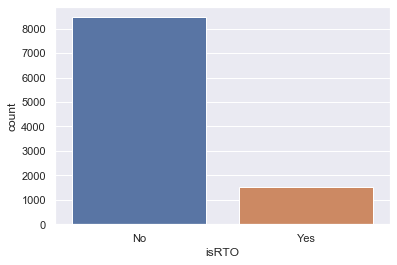

In [404]:
plot = sns.countplot(df["isRTO"])

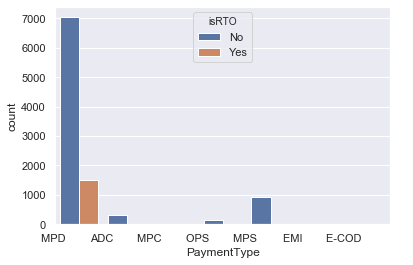

In [405]:
plot = sns.countplot(df["PaymentType"], 
                     hue=df["isRTO"])

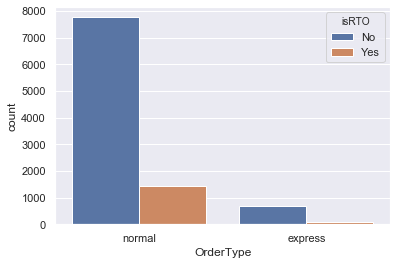

In [406]:
plot = sns.countplot(df["OrderType"], 
                     hue=df["isRTO"])

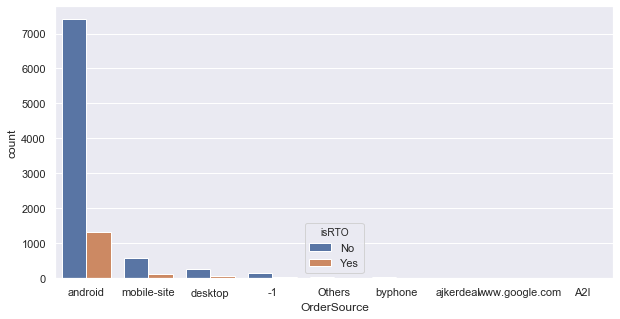

In [407]:
plt.figure(figsize=(10,5))
plot = sns.countplot(df["OrderSource"], 
                     hue=df["isRTO"])


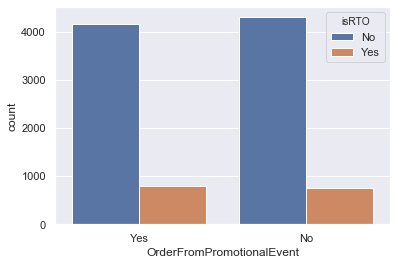

In [408]:
plot = sns.countplot(df["OrderFromPromotionalEvent"], 
                     hue=df["isRTO"])

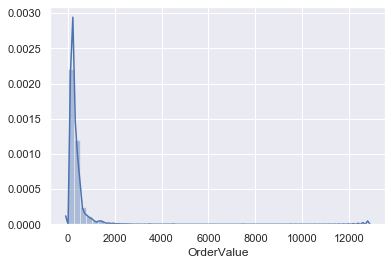

In [409]:
plot = sns.distplot(df["OrderValue"],
                    hist=True)

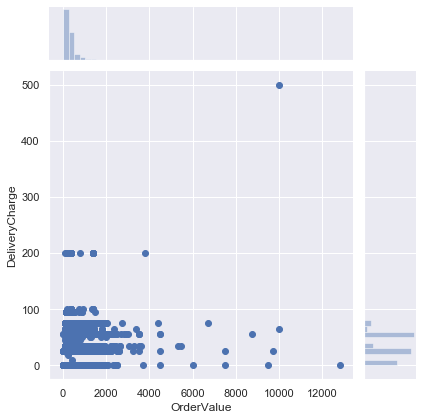

In [410]:
plot = sns.jointplot(x=df["OrderValue"],
                     y=df["DeliveryCharge"])

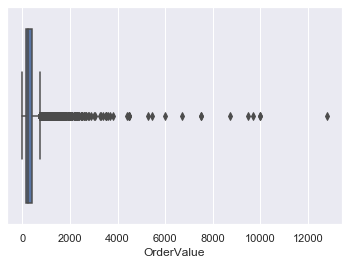

In [411]:
plot = sns.boxplot(df["OrderValue"])

In [412]:
df.groupby("isRTO").DeliveryCharge.mean()

isRTO
No     34.098996
Yes    32.052117
Name: DeliveryCharge, dtype: float64

In [413]:
df.columns

Index(['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District',
       'OrderSource', 'OrderType', 'DeliveryCharge', 'OrderPlacedDay',
       'OrderConfirmDayOverPhone', 'IsCartOrder', 'OrderFromPromotionalEvent',
       'isRTO'],
      dtype='object')

In [414]:
df.dtypes

OrderId                        int64
UserId                         int64
OrderValue                     int64
PaymentType                   object
District                      object
OrderSource                   object
OrderType                     object
DeliveryCharge               float64
OrderPlacedDay                object
OrderConfirmDayOverPhone      object
IsCartOrder                   object
OrderFromPromotionalEvent     object
isRTO                         object
dtype: object

In [415]:
cat_cols = ['PaymentType','District','OrderSource','OrderType','IsCartOrder','OrderFromPromotionalEvent','isRTO']
for col in cat_cols:
    df[col] = df[col].astype('category')
    print(col,'---->', dict(enumerate(df[col].cat.categories)))
    df[col] = df[col].cat.codes

PaymentType ----> {0: 'ADC                 ', 1: 'E-COD               ', 2: 'EMI                 ', 3: 'MPC                 ', 4: 'MPD                 ', 5: 'MPS                 ', 6: 'OPS                 '}
District ----> {0: 'Bagerhat', 1: 'Bandarban', 2: 'Barguna', 3: 'Barisal', 4: 'Bhola', 5: 'Bogra', 6: 'Brahmanbaria', 7: 'Chandpur', 8: 'Chapai-Nawabganj', 9: 'Chittagong (Outside City)', 10: 'Chittagong City', 11: 'Chuadanga', 12: 'Comilla', 13: "Cox's-Bazar", 14: 'Dhaka', 15: 'Dhaka (Outside City)', 16: 'Dinajpur', 17: 'Faridpur', 18: 'Feni', 19: 'Gaibandha', 20: 'Gazipur', 21: 'Gopalganj', 22: 'Habiganj', 23: 'Jamalpur', 24: 'Jessore', 25: 'Jhalokati', 26: 'Jhenaidah', 27: 'Joypurhat', 28: 'Khagrachhari', 29: 'Kishoreganj', 30: 'Kurigram', 31: 'Kushtia', 32: 'Lakshmipur', 33: 'Lalmonirhat', 34: 'Madaripur', 35: 'Magura', 36: 'Manikganj', 37: 'Meherpur', 38: 'Moulvibazar', 39: 'Munshiganj', 40: 'Mymensingh', 41: 'Naogaon', 42: 'Narail', 43: 'Narayanganj', 44: 'Narsingdi', 45: 'Na

In [416]:
df.corr()

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO
OrderId,1.000000,-0.015847,-0.004406,-0.063377,-0.090714,0.050423,-0.040551,-0.014454,-0.034550,0.018032,-0.193188
UserId,-0.015847,1.000000,-0.027036,0.047985,0.060094,-0.010503,-0.001260,0.120147,-0.109374,0.002648,0.020662
OrderValue,-0.004406,-0.027036,1.000000,0.044091,-0.006331,0.082708,-0.050334,0.155060,-0.090769,-0.265689,0.018192
PaymentType,-0.063377,0.047985,0.044091,1.000000,-0.003557,0.071338,-0.018262,-0.020335,0.074662,0.163196,0.000570
District,-0.090714,0.060094,-0.006331,-0.003557,1.000000,-0.080170,-0.095004,0.204678,0.004896,-0.008521,-0.059483
OrderSource,0.050423,-0.010503,0.082708,0.071338,-0.080170,1.000000,-0.126600,0.039496,0.016737,-0.057017,0.015815
OrderType,-0.040551,-0.001260,-0.050334,-0.018262,-0.095004,-0.126600,1.000000,-0.210752,0.013701,0.053261,0.035927
DeliveryCharge,-0.014454,0.120147,0.155060,-0.020335,0.204678,0.039496,-0.210752,1.000000,-0.450959,-0.068213,-0.029759
IsCartOrder,-0.034550,-0.109374,-0.090769,0.074662,0.004896,0.016737,0.013701,-0.450959,1.000000,0.154896,-0.018121
OrderFromPromotionalEvent,0.018032,0.002648,-0.265689,0.163196,-0.008521,-0.057017,0.053261,-0.068213,0.154896,1.000000,0.015847


In [417]:
del df['OrderPlacedDay']
del df['OrderConfirmDayOverPhone']
df.head(10)

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO
0,2562691,663791,168,4,14,4,1,25.0,0,1,0
1,2561859,961083,240,4,14,7,1,35.0,0,1,0
2,2561434,848517,120,4,14,6,1,35.0,0,1,1
3,2561202,276304,185,4,14,4,1,25.0,1,0,0
4,2561033,955384,201,4,14,4,1,25.0,0,1,0
5,2560941,832391,155,4,14,4,1,25.0,0,1,0
6,2560917,832391,105,4,14,4,1,25.0,0,0,0
7,2560916,442723,120,4,14,4,1,25.0,0,1,0
8,2560895,959412,499,4,13,4,1,55.0,0,0,1
9,2560881,959412,159,4,13,4,1,55.0,0,0,1


In [418]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns!='isRTO']
y = df.loc[:, df.columns=='isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

print("""X_train:{}
y_train:{}
X_test: {}
y_test: {}""".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(7500, 10)
y_train:(7500, 1)
X_test: (2500, 10)
y_test: (2500, 1)


In [419]:
from sklearn.linear_model import LogisticRegression

In [420]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [421]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [422]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()}).head(10)

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,1,0
9,0,0


In [423]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc))

The accuracy score is 0.8524


In [424]:
from sklearn.naive_bayes import GaussianNB

GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [425]:
NB = GaussianNB()

In [426]:
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [427]:
y_pred = NB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [428]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()}).head(10)

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,1,0
9,0,0


In [429]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc))

The accuracy score is 0.8452


In [430]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

In [431]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [432]:
y_pred = KNN.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [433]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()}).head(10)

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,1,1
8,1,0
9,0,1


In [434]:
acc = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc))

The accuracy score is 0.8396


In [435]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [436]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [437]:
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [438]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()}).head(10)

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,1,0
9,0,0


In [439]:
acc = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc))

The accuracy score is 0.7976


In [440]:
from sklearn import svm
Svm = svm.SVC()

In [441]:
Svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [442]:
y_pred = Svm.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [443]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()}).head(10)

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,1,0
9,0,0


In [444]:
acc = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc))

The accuracy score is 0.8524


In [445]:
from sklearn.model_selection import GridSearchCV

In [446]:
param_grid = {
    'C': np.logspace(-5, 8, 15),
} 

In [447]:
def gridsearch(X, y, estimator, param_grid, cv=5, n_jobs=2):
    grid = GridSearchCV(estimator=estimator, 
                        param_grid=param_grid, 
                        cv=cv, 
                        n_jobs=n_jobs)
    grid.fit(X, y)
    return grid.best_params_

In [448]:
print(gridsearch(X_train, y_train, LogisticRegression(), param_grid, 5))

{'C': 1e-05}


In [449]:
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)
acc1 = accuracy_score(y_test, y1_pred)

model2 = LogisticRegression(C=0.05179474679231213, penalty='l2')
model2.fit(X_train, y_train)
y2_pred = model2.predict(X_test)
acc2 = accuracy_score(y_test, y2_pred)

print("""Model 1: {}
Model 2: {}""".format(acc1, acc2))

Model 1: 0.8524
Model 2: 0.8524


In [450]:
from sklearn.model_selection import RandomizedSearchCV

In [451]:
def randomsearch(X, y, estimator, param_grid, cv=5, n_iter=10, n_jobs=2, random_state=1234):
    random = RandomizedSearchCV(estimator=estimator, 
                                param_distributions=param_grid, 
                                cv=cv, 
                                n_iter=n_iter, 
                                n_jobs=n_jobs,
                                random_state=random_state)
    random.fit(X, y)
    return random.best_params_

In [452]:
print(randomsearch(X_train, y_train, LogisticRegression(), param_grid, 5))

{'C': 11787686.347935867}


In [453]:
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)
acc1 = accuracy_score(y_test, y1_pred)

model2 = LogisticRegression(C= 0.006105402296585327, penalty='l2')
model2.fit(X_train, y_train)
y2_pred = model2.predict(X_test)
acc2 = accuracy_score(y_test, y2_pred)

print("""Model 1: {}
Model 2: {}""".format(acc1, acc2))

Model 1: 0.8524
Model 2: 0.8524


In [454]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [455]:
df.columns

Index(['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District',
       'OrderSource', 'OrderType', 'DeliveryCharge', 'IsCartOrder',
       'OrderFromPromotionalEvent', 'isRTO'],
      dtype='object')

In [456]:
num_cols = ['OrderValue','DeliveryCharge']
for col in num_cols:
    print(col,'-->',detect_outlier(df[col]))

OrderValue --> [10, 14, 15, 30, 75, 97, 103, 104, 114, 115, 127, 130, 131, 133, 139, 141, 153, 196, 256, 260, 262, 269, 274, 277, 284, 285, 300, 308, 370, 403, 417, 427, 490, 500, 512, 517, 522, 559, 591, 592, 593, 614, 629, 631, 634, 651, 664, 672, 676, 725, 736, 743, 751, 757, 759, 760, 768, 787, 799, 819, 822, 838, 857, 863, 869, 890, 895, 902, 903, 933, 948, 950, 952, 957, 965, 987, 1021, 1028, 1033, 1056, 1100, 1107, 1111, 1126, 1130, 1138, 1152, 1153, 1180, 1208, 1218, 1254, 1262, 1272, 1298, 1309, 1330, 1332, 1335, 1341, 1352, 1355, 1387, 1389, 1395, 1470, 1473, 1487, 1493, 1498, 1504, 1513, 1524, 1531, 1538, 1540, 1560, 1573, 1574, 1589, 1601, 1605, 1615, 1624, 1625, 1634, 1642, 1647, 1654, 1657, 1658, 1676, 1685, 1695, 1698, 1726, 1733, 1736, 1750, 1757, 1793, 1813, 1846, 1872, 1906, 1910, 1918, 1938, 1940, 1945, 1955, 1975, 1982, 1985, 1989, 1994, 2010, 2021, 2114, 2135, 2196, 2206, 2214, 2229, 2282, 2300, 2320, 2389, 2390, 2411, 2425, 2448, 2455, 2477, 2486, 2495, 2496, 2515

In [457]:
for col in num_cols:
    indx = detect_outlier(df[col])
    df[col].loc[indx] = df[col].median()

In [458]:
for col in num_cols:
    print(col,'-->',detect_outlier(df[col]))

OrderValue --> [76, 96, 140, 181, 222, 247, 253, 255, 264, 271, 313, 413, 527, 540, 542, 546, 564, 583, 584, 626, 637, 662, 670, 724, 754, 774, 898, 972, 978, 992, 1007, 1085, 1154, 1179, 1225, 1227, 1253, 1264, 1284, 1306, 1370, 1489, 1497, 1502, 1520, 1535, 1539, 1660, 1720, 1765, 1794, 1796, 1863, 1874, 1876, 1961, 1964, 1977, 2022, 2037, 2107, 2200, 2207, 2266, 2281, 2284, 2291, 2299, 2339, 2366, 2454, 2461, 2513, 2527, 2593, 2681, 2715, 2723, 2730, 2812, 2860, 2885, 2968, 3001, 3008, 3018, 3051, 3122, 3206, 3235, 3260, 3330, 3349, 3392, 3415, 3425, 3501, 3564, 3617, 3653, 3659, 3693, 3731, 3756, 3773, 3775, 3809, 3827, 3911, 3969, 3982, 4054, 4057, 4089, 4133, 4150, 4172, 4185, 4186, 4203, 4245, 4250, 4309, 4316, 4372, 4387, 4444, 4462, 4479, 4560, 4572, 4573, 4600, 4605, 4645, 4651, 4653, 4659, 4667, 4693, 4717, 4737, 4763, 4818, 4847, 4897, 4907, 4912, 4952, 4961, 4970, 5090, 5139, 5162, 5177, 5198, 5213, 5290, 5320, 5339, 5343, 5385, 5398, 5411, 5443, 5451, 5515, 5518, 5520, 55

In [459]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns!='isRTO']
y = df.loc[:, df.columns=='isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

print("""X_train:{}
y_train:{}
X_test: {}
y_test: {}""".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(7500, 10)
y_train:(7500, 1)
X_test: (2500, 10)
y_test: (2500, 1)


In [460]:
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)
acc1 = accuracy_score(y_test, y1_pred)

model2 = LogisticRegression(C=0.05179474679231213, penalty='l2')
model2.fit(X_train, y_train)
y2_pred = model2.predict(X_test)
acc2 = accuracy_score(y_test, y2_pred)

print("""Model 1: {}
Model 2: {}""".format(acc1, acc2))

Model 1: 0.8524
Model 2: 0.8524


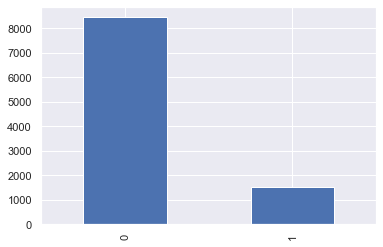

In [461]:
pd.Series(df['isRTO']).value_counts().plot.bar();

In [462]:
df.isRTO.value_counts()

0    8465
1    1535
Name: isRTO, dtype: int64

In [463]:
df.shape

(10000, 11)

In [464]:
from sklearn.utils import resample

In [465]:
# Separate majority and minority classes
df_majority = df[df.isRTO==0]
df_minority = df[df.isRTO==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=8465,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
df_upsampled.isRTO.value_counts()


1    8465
0    8465
Name: isRTO, dtype: int64

In [466]:
# Separate majority and minority classes
df_majority = df[df.isRTO==0]
df_minority = df[df.isRTO==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1535,     # to match minority class
                                 random_state=123) # reproducible results
 

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.isRTO.value_counts()

1    1535
0    1535
Name: isRTO, dtype: int64

In [467]:
from sklearn.model_selection import train_test_split

X = df_upsampled.loc[:, df_upsampled.columns!='isRTO']
y = df_upsampled.loc[:, df_upsampled.columns=='isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

print("""X_train:{}
y_train:{}
X_test: {}
y_test: {}""".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(12697, 10)
y_train:(12697, 1)
X_test: (4233, 10)
y_test: (4233, 1)


In [468]:
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)
acc1 = accuracy_score(y_test, y1_pred)

model2 = LogisticRegression(C=0.05179474679231213, penalty='l2')
model2.fit(X_train, y_train)
y2_pred = model2.predict(X_test)
acc2 = accuracy_score(y_test, y2_pred)

print("""Model 1: {}
Model 2: {}""".format(acc1, acc2))

Model 1: 0.5147649421214269
Model 2: 0.5147649421214269


In [469]:
from sklearn.model_selection import train_test_split

X = df_downsampled.loc[:, df_downsampled.columns!='isRTO']
y = df_downsampled.loc[:, df_downsampled.columns=='isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

print("""X_train:{}
y_train:{}
X_test: {}
y_test: {}""".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(2302, 10)
y_train:(2302, 1)
X_test: (768, 10)
y_test: (768, 1)


In [470]:
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)
acc1 = accuracy_score(y_test, y1_pred)

model2 = LogisticRegression(C=0.05179474679231213, penalty='l2')
model2.fit(X_train, y_train)
y2_pred = model2.predict(X_test)
acc2 = accuracy_score(y_test, y2_pred)

print("""Model 1 Logistic: {}
Model 2 Logistic: {}""".format(acc1, acc2))

Model 1 Logistic: 0.5104166666666666
Model 2 Logistic: 0.5104166666666666


In [471]:
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
acc = accuracy_score(y_test, y2_pred)
print("Model DecisionTree: {}".format(acc))

Model DecisionTree: 0.5104166666666666


In [472]:
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
acc = accuracy_score(y_test, y2_pred)
print("Model NaiveBayes: {}".format(acc))

Model NaiveBayes: 0.5104166666666666


In [473]:
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y2_pred)
print("Model KNN: {}".format(acc))

Model KNN: 0.5104166666666666


In [474]:
Svm.fit(X_train,y_train)
y_pred = Svm.predict(X_test)
acc = accuracy_score(y_test, y2_pred)
print("Model SVM: {}".format(acc))

Model SVM: 0.5104166666666666


In [475]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns!='isRTO']
y = df.loc[:, df.columns=='isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=123)

print("""Training datset: {},
Validation Dataset: {},
Test Dataset: {},
""".format(X_train.shape, X_val.shape, X_test.shape))

Training datset: (6000, 10),
Validation Dataset: (2000, 10),
Test Dataset: (2000, 10),



In [476]:
model1 = LogisticRegression(C=1.0, penalty='l2').fit(X_train, y_train)

model1_yval = model1.predict(X_val)
model1_ytest = model1.predict(X_test)

acc1_val = accuracy_score(y_test, model1_yval)
acc1_test = accuracy_score(y_test, model1_ytest)

# print("Model 1 Validation Accuracy: {}".format(acc1_val))
print("Model 1 Test Accuracy: {}".format(acc1_test))

Model 1 Test Accuracy: 0.859


In [477]:
from sklearn.model_selection import train_test_split

X = df_downsampled.loc[:, df_downsampled.columns!='isRTO']
y = df_downsampled.loc[:, df_downsampled.columns=='isRTO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=123)

print("""Training datset: {},
Validation Dataset: {},
Test Dataset: {},
""".format(X_train.shape, X_val.shape, X_test.shape))

Training datset: (1842, 10),
Validation Dataset: (614, 10),
Test Dataset: (614, 10),



In [478]:
model1 = LogisticRegression(C=1.0, penalty='l2').fit(X_train, y_train)

model1_yval = model1.predict(X_val)
model1_ytest = model1.predict(X_test)

acc1_val = accuracy_score(y_test, model1_yval)
acc1_test = accuracy_score(y_test, model1_ytest)

# print("Model 1 Validation Accuracy: {}".format(acc1_val))
print("Model 1 Test Accuracy: {}".format(acc1_test))

Model 1 Test Accuracy: 0.4804560260586319


In [479]:
model2 = LogisticRegression(C=1.0, penalty='l2').fit(X_train, y_train)

model2_yval = model2.predict(X_val)
model2_ytest = model2.predict(X_test)

acc2_val = accuracy_score(y_test, model2_yval)
acc2_test = accuracy_score(y_test, model2_ytest)

print("Model 2 Validation Accuracy: {}".format(acc2_val))
print("Model 2 Test Accuracy: {}".format(acc2_test))

Model 2 Validation Accuracy: 0.47068403908794787
Model 2 Test Accuracy: 0.4804560260586319


In [480]:
model3 = LogisticRegression(C=0.0001, penalty='l2').fit(X_train, y_train)

model3_yval = model3.predict(X_val)
model3_ytest = model3.predict(X_test)

acc3_val = accuracy_score(y_test, model3_yval)
acc3_test = accuracy_score(y_test, model3_ytest)

print("Model 3 Validation Accuracy: {}".format(acc3_val))
print("Model 3 Test Accuracy: {}".format(acc3_test))

Model 3 Validation Accuracy: 0.47068403908794787
Model 3 Test Accuracy: 0.4804560260586319
